In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report


In [2]:
os.getcwd()

'C:\\Users\\jaiveer.karra.1\\Google Drive'

In [3]:
os.chdir("C:\\Users\\jaiveer.karra.1\\Google Drive\\02 Lab Data\\Python")

In [4]:
titanic_data=pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,##$1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,xyz,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
type(titanic_data)

pandas.core.frame.DataFrame

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null object
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print("number of passengers travelling in titanic ship :"+str(len(titanic_data["PassengerId"])))

number of passengers travelling in titanic ship :891


In [9]:
titanic_data['PassengerId'][0]=1
titanic_data['PassengerId'][9]=10
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,xyz,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


##Data Analyzing

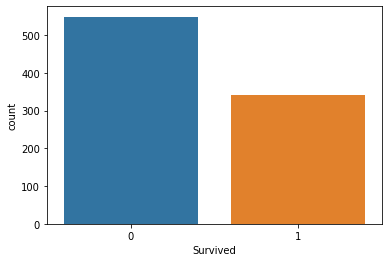

In [10]:
sns.countplot(x="Survived",data=titanic_data)


In [48]:
sur_yes=titanic_data[titanic_data["Survived"]==0]
sur_no=titanic_data[titanic_data["Survived"]==1]
print(sur_yes.shape,sur_no.shape)

(424, 11) (288, 11)


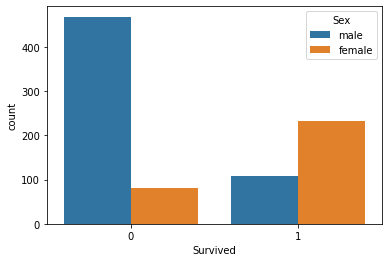

In [11]:
sns.countplot(x="Survived" ,hue="Sex",data=titanic_data)

## Clean the data by removing null values

In [12]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False


In [13]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

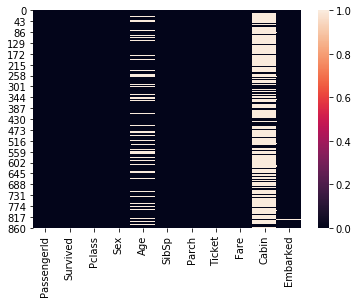

In [14]:
sns.heatmap(titanic_data.isnull())

In [15]:
titanic_data.drop("Cabin",axis=1,inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


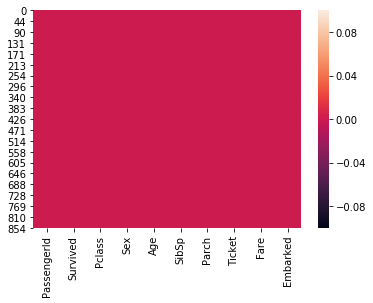

In [16]:
titanic_data.dropna(inplace=True)
sns.heatmap(titanic_data.isnull())

In [17]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
Sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
embarked=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
pclass=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [21]:
titanic_data=pd.concat([titanic_data,Sex,embarked,pclass],axis=1)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [23]:
titanic_data.drop(["Sex","Embarked","Ticket","Pclass"],axis=1,inplace=True)
titanic_data.tail()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
885,886,0,39.0,0,5,29.125,0,1,0,0,1
886,887,0,27.0,0,0,13.000,1,0,1,1,0
887,888,1,19.0,0,0,30.000,0,0,1,0,0
889,890,1,26.0,0,0,30.000,1,0,0,0,0
890,891,0,32.0,0,0,7.750,1,1,0,0,1


## Train and test the data

In [24]:
titanic_data.columns

Index(['PassengerId',    'Survived',         'Age',       'SibSp',
             'Parch',        'Fare',        'male',           'Q',
                 'S',             2,             3],
      dtype='object')

In [25]:
X=titanic_data[["PassengerId",'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3]].values
type(X)

numpy.ndarray

In [26]:
type(X),(X.ndim)

(numpy.ndarray, 2)

In [27]:
X[5:10]

array([['7', 54.0, 0, 0, 51.8625, 1, 0, 1, 0, 0],
       ['8', 2.0, 3, 1, 21.075, 1, 0, 1, 0, 1],
       ['9', 27.0, 0, 2, 11.1333, 0, 0, 1, 0, 1],
       [10, 14.0, 1, 0, 30.0708, 0, 0, 0, 1, 0],
       ['11', 4.0, 1, 1, 16.7, 0, 0, 1, 0, 1]], dtype=object)

In [28]:
y=titanic_data['Survived'].values
type(y),(y.ndim)

(numpy.ndarray, 1)

In [29]:
(X.ndim),(y.ndim),(X.shape),(y.shape)

(2, 1, (712, 10), (712,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [31]:
(X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape)

((498, 10), (498,), (214, 10), (214,))

## Fit the model

In [32]:
titanic_lr=LogisticRegression()
titanic_lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## predict the model

In [33]:
y_pred=titanic_lr.predict(X_test)

In [34]:
acc=accuracy_score(y_test,y_pred)
acc

0.780373831775701

##confusion mtrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[106,  16],
       [ 31,  61]], dtype=int64)

In [36]:
107+15+30+62

214

## classification report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       122
           1       0.79      0.66      0.72        92

   micro avg       0.78      0.78      0.78       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



## Roc curve

In [38]:
y_pred[0:15]

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [39]:
titanic_lr.predict_proba(X_test[0:15])

array([[0.05387903, 0.94612097],
       [0.14012789, 0.85987211],
       [0.70443906, 0.29556094],
       [0.03202191, 0.96797809],
       [0.7172947 , 0.2827053 ],
       [0.31933459, 0.68066541],
       [0.57649378, 0.42350622],
       [0.1108696 , 0.8891304 ],
       [0.67560435, 0.32439565],
       [0.40851286, 0.59148714],
       [0.90769309, 0.09230691],
       [0.86576967, 0.13423033],
       [0.91193966, 0.08806034],
       [0.71523227, 0.28476773],
       [0.47333446, 0.52666554]])

In [40]:
y_pred_prob = titanic_lr.predict_proba(X_test)[:,1]

In [41]:
roc_curve?

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

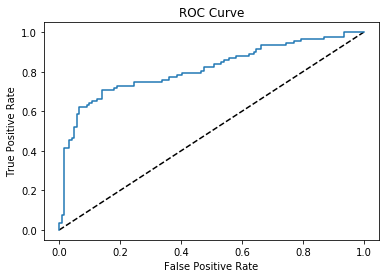

In [43]:
import matplotlib.pyplot as plt 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Hyper parameter tuning for Gridserach cv

In [44]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7752808988764045


In [49]:
echo wazup


wazup
